In [2]:
from toolbox import *
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
np.set_printoptions(precision=4,suppress=True)

(5e-05, 0.00095)

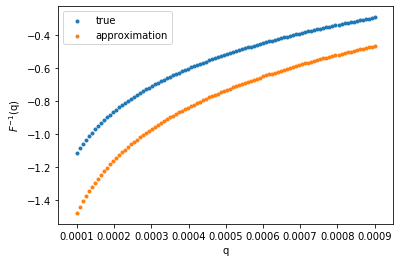

In [42]:
NIG_law = norminvgauss(2,1,2,3)
r1 = .0001
r2 = .0009
r0 = min( r1, r2, 1-r1, 1-r2)/2

q_arr = np.linspace(r1,r2,100)
Zq = stats.norm.ppf(q_arr)

# Pass quantiles to the approx function
Xq_approx = NIG_law.ppf_approx(Zq)
Xq_true = np.array([NIG_law.ppf(q)[0] for q in q_arr])
plt.scatter(q_arr, Xq_true,  label="true", marker='.')
plt.scatter(q_arr, Xq_approx,  label='approximation', marker='.')
plt.legend()
plt.ylabel(r"$F^{-1}$(q)")
plt.xlabel(r"q")
plt.xlim((r1-r0,r2+r0))

Text(0.5, 0, 'q')

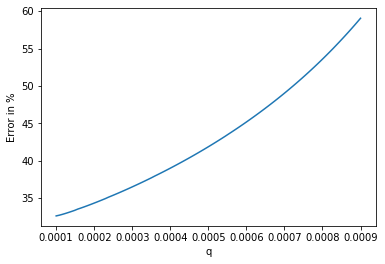

In [43]:
plt.plot(q_arr, 100*(Xq_approx - Xq_true)/Xq_true)
plt.ylabel("Error in %")
plt.xlabel("q")

(0.99895, 0.99995)

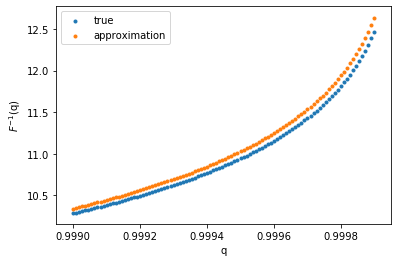

In [38]:
NIG_law = norminvgauss(2,1,2,3)
r1 = .9990
r2 = .9999
r0 = min( r1, r2, 1-r1, 1-r2)/2

q_arr = np.linspace(r1,r2,100)
Zq = stats.norm.ppf(q_arr)

Xq_approx = NIG_law.ppf_approx(Zq)
Xq_true = np.array([NIG_law.ppf(q)[0] for q in q_arr])
plt.scatter(q_arr, Xq_true,  label="true", marker='.')
plt.scatter(q_arr, Xq_approx,  label='approximation', marker='.')
plt.legend()
plt.ylabel(r"$F^{-1}$(q)")
plt.xlabel(r"q")
plt.xlim((r1-r0,r2+r0))

Text(0.5, 0, 'q')

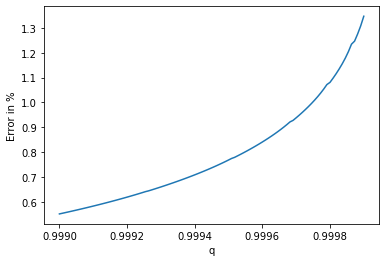

In [41]:
plt.plot(q_arr, 100*(Xq_approx - Xq_true)/Xq_true)
plt.ylabel("Error in %")
plt.xlabel("q")

In [52]:
q=0.09
Zq = stats.norm.ppf(q)
Xq = NIG_law.ppf_approx(Zq)
print(" q                   :"  , q,
      "\n X (CF approximation):", Xq,
      "\n X (True)            :", NIG_law.ppf(q)[0],
      "\n F (X approx)        :", NIG_law.cdf(Xq), 
      "\n X diff in %         :", 100*(Xq-NIG_law.ppf(q)[0])/NIG_law.ppf(q)[0])

 q                   : 0.09 
 X (CF approximation): 1.8928008683329518 
 X (True)            : 1.8835008631306338 
 F (X approx)        : 0.09127803460946816 
 X diff in %         : 0.4937616639506141


(0.0005, 0.9994999999999999)

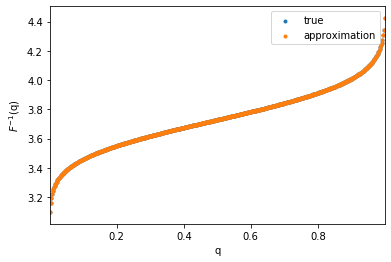

In [64]:
NIG_law = norminvgauss(100,50,2,3)
r1 = .001
r2 = .999
r0 = min( r1, r2, 1-r1, 1-r2)/2

q_arr = np.linspace(r1,r2,500)
Zq = stats.norm.ppf(q_arr)

# Pass quantiles to the approx function
Xq_approx = NIG_law.ppf_approx(Zq)
Xq_true = np.array([NIG_law.ppf(q)[0] for q in q_arr])
plt.scatter(q_arr, Xq_true,  label="true", marker='.')
plt.scatter(q_arr, Xq_approx,  label='approximation', marker='.')
plt.legend()
plt.ylabel(r"$F^{-1}$(q)")
plt.xlabel(r"q")
plt.xlim((r1-r0,r2+r0))

Text(0.5, 0, 'q')

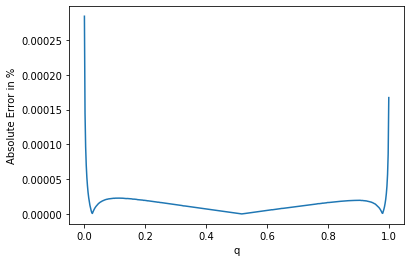

In [65]:
plt.plot(q_arr, (np.abs(100*(Xq_approx - Xq_true)/Xq_true)))
plt.ylabel("Absolute Error in %")
plt.xlabel("q")

In [58]:
%%time 
Xq_approx = NIG_law.ppf_approx(Zq)

CPU times: user 665 µs, sys: 426 µs, total: 1.09 ms
Wall time: 742 µs


In [59]:
%%time
Xq_true = np.array([NIG_law.ppf(q)[0] for q in q_arr])

CPU times: user 22.3 s, sys: 134 ms, total: 22.4 s
Wall time: 22.5 s


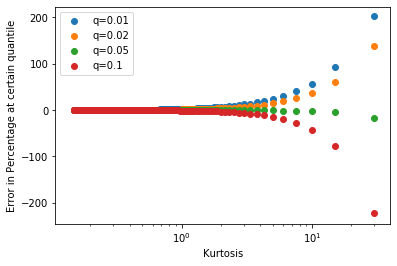

In [126]:
q_arr = [0.01,0.02,0.05,0.1]
for q in q_arr:
    alpha_arr = np.linspace(0.1,20,200)
    kurt = np.ones(len(alpha_arr))
#     q=0.01
    Zq = stats.norm.ppf(q)
    error_arr = np.ones(len(alpha_arr))

    for i in range(len(alpha_arr)):
        NIG_law = norminvgauss(alpha_arr[i],0,0,1)
        kurt[i] = NIG_law.kurtosis()
        true = NIG_law.ppf(q)[0]
        approx = NIG_law.ppf_approx(Zq)
        error_arr[i] = 100*(approx-true)/true
    plt.scatter(kurt, error_arr, label="q=%s"%q)
    
plt.xlabel("Kurtosis")
plt.ylabel("Error in Percentage at certain quantile")
plt.xscale('log')
plt.legend()

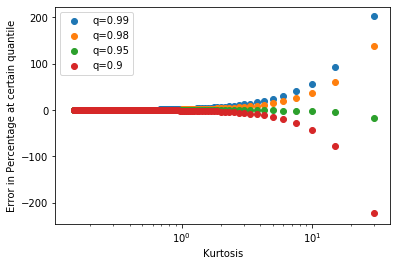

In [127]:
q_arr = [0.99,0.98,0.95,0.90]
for q in q_arr:
    alpha_arr = np.linspace(0.1,20,200)
    kurt = np.ones(len(alpha_arr))
#     q=0.01
    Zq = stats.norm.ppf(q)
    error_arr = np.ones(len(alpha_arr))

    for i in range(len(alpha_arr)):
        NIG_law = norminvgauss(alpha_arr[i],0,0,1)
        kurt[i] = NIG_law.kurtosis()
        true = NIG_law.ppf(q)[0]
        approx = NIG_law.ppf_approx(Zq)
        error_arr[i] = 100*(approx-true)/true
    plt.scatter(kurt, error_arr, label="q=%s"%q)
    
plt.xlabel("Kurtosis")
plt.ylabel("Error in Percentage at certain quantile")
plt.xscale('log')
plt.legend()

## Error in Special Case of NIG
$$\text{NIG}(\alpha, 0, 0, \alpha) \overset{\alpha \rightarrow \infty}{\rightarrow} N(0,1)$$

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 q                   : 0.1 
 X (CF approximation): -1.2812035921058627 
 X (True)            : -1.2812040380168133 
 F (X approx)        : 0.10000007697636942 
 X diff in %         : -3.480405441888378e-05 
 Kurtosis            : 0.0048


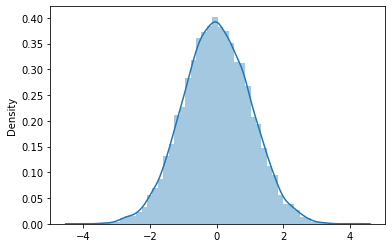

In [163]:
alpha = 25

NIG_law = norminvgauss(alpha,0,0,alpha)
NIG = NIG_law.rvs(10000)
import seaborn as sns
sns.distplot(NIG)

q=0.1
Zq = stats.norm.ppf(q)
Xq = NIG_law.ppf_approx(Zq)
print(" q                   :"  , q,
      "\n X (CF approximation):", Xq,
      "\n X (True)            :", NIG_law.ppf(q)[0],
      "\n F (X approx)        :", NIG_law.cdf(Xq), 
      "\n X diff in %         :", 100*(Xq-NIG_law.ppf(q)[0])/NIG_law.ppf(q)[0], 
      "\n Kurtosis            :", NIG_law.kurtosis())

## Comparing method of sampling and CF on speed and accuracy

In [262]:
q_arr = np.linspace(0.001,.99, 100)

In [291]:
%%time
# Ground Truth
NIG_law = norminvgauss(1,0,0,1)
q_true_arr = np.ones(len(q_arr))
for i in range(len(q_arr)):
    q_true_arr[i] = NIG_law.ppf(q_arr[i])

CPU times: user 5.22 s, sys: 35.8 ms, total: 5.26 s
Wall time: 5.25 s


In [326]:
%%time
# Sampling
NIG_law = norminvgauss(1,0,0,1)
NIG = NIG_law.rvs(10000000)
q_sample = np.quantile(NIG, q_arr)

CPU times: user 1.3 s, sys: 168 ms, total: 1.47 s
Wall time: 1.47 s


In [327]:
%%time
# CF Approximation
NIG_law = norminvgauss(1,0,0,1)
Zq = stats.norm.ppf(q_arr)
q_CF = NIG_law.ppf_approx(Zq)

CPU times: user 938 µs, sys: 512 µs, total: 1.45 ms
Wall time: 1.03 ms


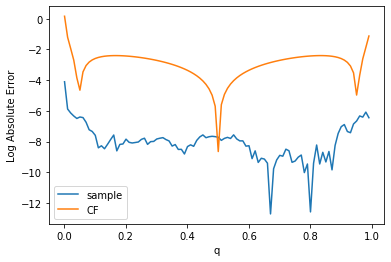

In [328]:
error_sample = np.abs(q_sample - q_true_arr ) 
error_CF = np.abs(q_CF - q_true_arr ) 
plt.plot(q_arr, np.log(error_sample), label="sample")
plt.plot(q_arr, np.log(error_CF), label="CF")
plt.ylabel("Log Absolute Error")
plt.xlabel("q")
plt.legend()

In [ ]:
# Paper about improving CF approximation https://arxiv.org/pdf/0708.1627.pdf